             COUNTY       ANN    RISK_VALUE
0           ALAMEDA  5.195545  1.368905e+09
1            AMADOR  5.300000  1.769684e+07
2             BUTTE  5.194000  1.672251e+08
3      CONTRA COSTA  4.829000  6.615626e+08
4            FRESNO  5.546318  2.310903e+08
5             GLENN  5.229000  9.395029e+07
6          HUMBOLDT  4.957000  1.604842e+08
7          IMPERIAL  5.926636  2.304504e+08
8              KERN  5.661279  3.489352e+08
9             KINGS  5.496000  4.993155e+07
10             LAKE  5.225500  5.585125e+07
11           LASSEN  5.088000  1.582432e+07
12      LOS ANGELES  5.670374  5.326193e+09
13           MADERA  5.470667  8.962989e+07
14            MARIN  5.222000  1.249177e+08
15        MENDOCINO  5.019000  9.845231e+07
16           MERCED  5.449200  1.036750e+08
17         MONTEREY  5.388833  2.635884e+08
18             NAPA  5.222000  2.103007e+08
19           ORANGE  5.504000  1.246484e+09
20           PLACER  5.309000  4.134690e+07
21        RIVERSIDE  5.775500  1

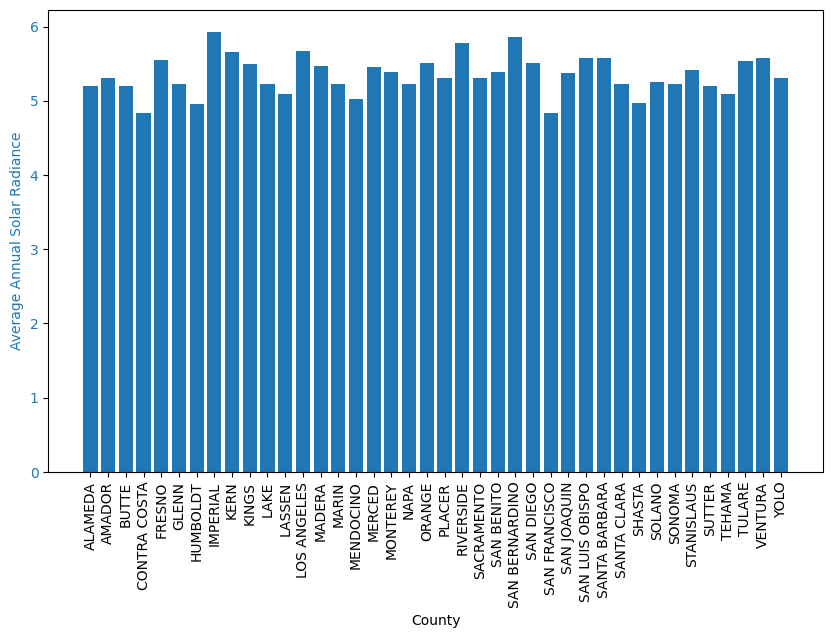

In [4]:
"""
Created on Thu Nov 30 01:15:23 2023

@author: savidd
"""
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


df = pd.read_csv('risk_solar_locations_combined.csv')
#print(df['COUNTY'])

average_annual = df.groupby('COUNTY').agg({'ANN': 'mean', 'RISK_VALUE': 'mean'}).reset_index()

print(average_annual)
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average annual on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('County')
ax1.set_ylabel('Average Annual Solar Radiance', color=color)
ax1.bar(average_annual['COUNTY'], average_annual['ANN'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation='vertical')
plt.show()

# # Create a second y-axis on the right
# ax2 = ax1.twinx()
# color = 'tab:red'
# # Use value_counts to get the count of each unique county
# county_counts = df['COUNTY'].value_counts()
# # Use numpy arrays for both x and y values
# x_values = county_counts.index
# y_values = county_counts.values
# ax2.set_ylabel('Row Count', color=color)
# ax2.plot(x_values, y_values, color=color)
# ax2.tick_params(axis='y', labelcolor=color)


# Show the plot
plt.show()

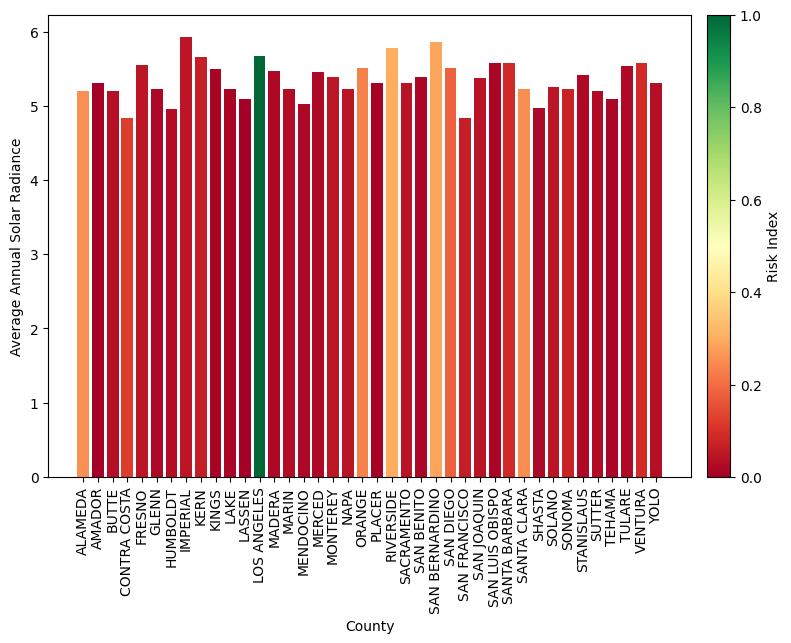

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average annual on the left y-axis with a gradient colormap based on risk index
color = average_annual['RISK_VALUE']
bars = ax1.bar(average_annual['COUNTY'], average_annual['ANN'], color=cm.RdYlGn((color / max(color))))
ax1.set_xlabel('County')
ax1.set_ylabel('Average Annual Solar Radiance')
plt.xticks(rotation='vertical')
cbar = plt.colorbar(cm.ScalarMappable(cmap='RdYlGn'), ax=ax1, orientation='vertical', pad=0.02)
cbar.set_label('Risk Index')
# Add colorbar
# cbar = plt.colorbar(cm.ScalarMappable(cmap='RdYlGn'), ax=ax1, orientation='vertical', pad=0.02)
# cbar.set_label('RISK_VALUE')